In [1]:
! pip install urduhack

     |████████████████████████████████| 105 kB 5.3 MB/s 
     |████████████████████████████████| 3.4 MB 11.8 MB/s 
     |████████████████████████████████| 1.1 MB 19.9 MB/s 
     |████████████████████████████████| 462 kB 36.3 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report

### 1.1 Urduhack

Urduhack is a NLP library for urdu language. It comes with a lot of battery included features to help you process Urdu data in the easiest way possible.
 
https://docs.urduhack.com/en/stable/



In [3]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

98304/89078 [=================================] - 0s 0us/step


## 2. Read Dataset into Pandas

In [7]:
train_data = pd.read_csv("imdb_urdu_reviews_train.csv")
test_data = pd.read_csv("imdb_urdu_reviews_test.csv")

train_data.head(), test_data.head()

(                                              review sentiment
 0  میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...  positive
 1  چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...  negative
 2  ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...  positive
 3  مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...  negative
 4  یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...  positive,
                                               review sentiment
 0  یہ بے گھر خواتین کے بارے میں ایک دستاویزی فلم ...  negative
 1  بالکل بھی اچھ ،ی کام نہیں کیا گیا ، پوری فلم ص...  negative
 2  یہ عجیب بات ہے کہ کچھ لوگوں کا کیا حشر ہوتا ہے...  negative
 3  اور یہ خاص طور پر وکیلوں اور پولیس اہلکاروں کے...  positive
 4  پہلے ، ایک وضاحت: میری سرخی کے باوجود ، میں اس...  positive)

In [8]:
# Combine Both Files to Preprocess
data =  pd.concat([train_data, test_data]).reset_index(drop=True)
print(data.shape)


(50000, 2)


In [9]:
# Make copy of a dataset
df =  data.copy()
df

,review,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive
...,...,...
49995,اگر آپ چیخنا چاہتے ہو یا بڑے اسٹوڈیو ہارر پراڈ...,positive
49996,براہ راست یہ ایک محض ایک چھوٹی سی چھوٹی چھوٹی ...,positive
49997,میں نے اس فلم کو کل رات آدھی رات کو چپکے سے پہ...,negative
49998,دیکھنا کوئی آسان فلم نہیں ہے - یہ ساڑھے تین گھ...,positive


## 3. Data Analysis

In [10]:
# Columns in the dataframe
df.columns

Index(['review', 'sentiment'], dtype='object')

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


There is no null value in the dataframe.

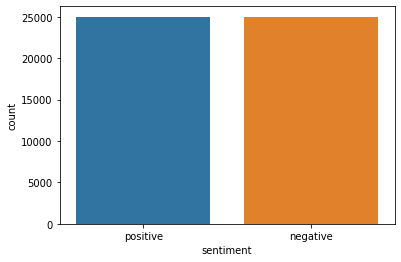

In [12]:
sns.countplot( x = 'sentiment', data = df );

In [13]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

## 4. Data Preprocessing

### 4.1 Label Encoding of Target Variable

In [14]:
# Encode the labels
le = LabelEncoder()
le.fit(df['sentiment'])
df['encoded_sentiments'] = le.transform(df['sentiment'])


In [15]:
df.head()

,review,sentiment,encoded_sentiments
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,positive,1
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,negative,0
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,positive,1
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,negative,0
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,positive,1


### 4.2 Apply UrduHack Preprocessing

In [16]:
df['review'] = df['review'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
df['review'] = df['review'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
df['review'] = df['review'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
df['review'] = df['review'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
df['review'] = df['review'].apply(replace_emails) # Replace all emails in text str with replace_with str.
df['review'] = df['review'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
df['review'] = df['review'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
df['review'] = df['review'].apply(remove_english_alphabets) # Removes English words and digits from a text
df['review'] = df['review'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.

In [17]:
# Remove Unicodes from Text
import regex as re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [18]:
# Remove stop words from text
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [19]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "
    
    return lemme_str

In [20]:
df['review'] = df['review'].apply(deEmojify)

In [21]:
df['review'] =  df['review'].apply(remove_stopwords)

In [22]:
df['lemmatizer'] = df['review'].apply(lemitizeStr)

In [23]:
df

,review,sentiment,encoded_sentiments,lemmatizer
0,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...,positive,1,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...
1,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...,negative,0,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...
2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,positive,1,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...
3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...,negative,0,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...
4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,positive,1,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...
...,...,...,...,...
49995,چیخنا بڑے اسٹوڈیو ہارر پراڈکٹ چیز دنوں مجبور ہ...,positive,1,چیخنا بڑے اسٹوڈیو ہارر پراڈکٹ چیز دنوں مجبور ہ...
49996,براہ راست چھوٹی چھوٹی چھوٹی چھوٹی مدت دورانیہ ...,positive,1,براہ راست چھوٹی چھوٹی چھوٹی چھوٹی مدت دورانیہ ...
49997,فلم کل رات آدھی رات چپکے پیش کش اسکریننگ دیکھا...,negative,0,فلم کل رات آدھی رات چپکے پیش کش اسکریننگ دیکھا...
49998,دیکھنا آسان فلم تین گھنٹے زیادہ لمبا مکمل گفتگ...,positive,1,دیکھنا آسان فلم تین گھنٹے زیادہ لمبا مکمل گفتگ...


# Word2Vector Implementation

In [24]:
df_w2v = df.copy() 

In [25]:
df_w2v

,review,sentiment,encoded_sentiments,lemmatizer
0,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...,positive,1,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...
1,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...,negative,0,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...
2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,positive,1,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...
3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...,negative,0,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...
4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,positive,1,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...
...,...,...,...,...
49995,چیخنا بڑے اسٹوڈیو ہارر پراڈکٹ چیز دنوں مجبور ہ...,positive,1,چیخنا بڑے اسٹوڈیو ہارر پراڈکٹ چیز دنوں مجبور ہ...
49996,براہ راست چھوٹی چھوٹی چھوٹی چھوٹی مدت دورانیہ ...,positive,1,براہ راست چھوٹی چھوٹی چھوٹی چھوٹی مدت دورانیہ ...
49997,فلم کل رات آدھی رات چپکے پیش کش اسکریننگ دیکھا...,negative,0,فلم کل رات آدھی رات چپکے پیش کش اسکریننگ دیکھا...
49998,دیکھنا آسان فلم تین گھنٹے زیادہ لمبا مکمل گفتگ...,positive,1,دیکھنا آسان فلم تین گھنٹے زیادہ لمبا مکمل گفتگ...


In [26]:
import spacy
def tokenizer(str):
    nlp = spacy.blank('ur')
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]
df_w2v["tokens"] = df_w2v["lemmatizer"].apply(tokenizer)

In [27]:
df_w2v

,review,sentiment,encoded_sentiments,lemmatizer,tokens
0,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...,positive,1,دہائی وسط کیبل گائیڈ اسکائینجر ہنٹ پہلو اپیل ع...,"[دہائی, وسط, کیبل, گائیڈ, اسکائینجر, ہنٹ, پہلو..."
1,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...,negative,0,دہائی انسپکٹر گیجٹ کارٹون پسند فلم دیکھنے پیسہ...,"[دہائی, انسپکٹر, گیجٹ, کارٹون, پسند, فلم, دیکھ..."
2,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,positive,1,معاشرے حالت تعجب والد پیدا البرٹ ٹی فٹزجیرالڈ ...,"[معاشرے, حالت, تعجب, والد, پیدا, البرٹ, ٹی, فٹ..."
3,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...,negative,0,مفید البرٹ پیون ردی ٹوکری گریڈ زیڈ جلدی ٹم تھا...,"[مفید, البرٹ, پیون, ردی, ٹوکری, گریڈ, زیڈ, جلد..."
4,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,positive,1,کولمبو ہدایتکاری کیریئر ابتدائی وقت اسٹیون اسپ...,"[کولمبو, ہدایتکاری, کیریئر, ابتدائی, وقت, اسٹی..."
...,...,...,...,...,...
49995,چیخنا بڑے اسٹوڈیو ہارر پراڈکٹ چیز دنوں مجبور ہ...,positive,1,چیخنا بڑے اسٹوڈیو ہارر پراڈکٹ چیز دنوں مجبور ہ...,"[چیخنا, بڑے, اسٹوڈیو, ہارر, پراڈکٹ, چیز, دنوں,..."
49996,براہ راست چھوٹی چھوٹی چھوٹی چھوٹی مدت دورانیہ ...,positive,1,براہ راست چھوٹی چھوٹی چھوٹی چھوٹی مدت دورانیہ ...,"[براہ, راست, چھوٹی, چھوٹی, چھوٹی, چھوٹی, مدت, ..."
49997,فلم کل رات آدھی رات چپکے پیش کش اسکریننگ دیکھا...,negative,0,فلم کل رات آدھی رات چپکے پیش کش اسکریننگ دیکھا...,"[فلم, کل, رات, آدھی, رات, چپکے, پیش, کش, اسکری..."
49998,دیکھنا آسان فلم تین گھنٹے زیادہ لمبا مکمل گفتگ...,positive,1,دیکھنا آسان فلم تین گھنٹے زیادہ لمبا مکمل گفتگ...,"[دیکھنا, آسان, فلم, تین, گھنٹے, زیادہ, لمبا, م..."


In [28]:
import gensim

model_word2vec = gensim.models.Word2Vec(sentences=df_w2v["tokens"], size=128, window=5, workers=10, min_count = 1)

In [29]:
model_word2vec.wv.most_similar("مرد")

[('مردوں', 0.7940453290939331),
 ('خواتین', 0.7470582127571106),
 ('عورتوں', 0.7303816676139832),
 ('عورتیں', 0.6928523778915405),
 ('مردانہ', 0.6783639192581177),
 ('سیسہ', 0.6746035218238831),
 ('ڈارونین', 0.6141440868377686),
 ('عورت', 0.6054088473320007),
 ('برہنہ', 0.5838421583175659),
 ('تعصبانہ', 0.5799935460090637)]

In [30]:
model_word2vec.wv.most_similar("آسان")

[('مشکل', 0.7474721670150757),
 ('ناممکن', 0.68934166431427),
 ('پیچیدہ', 0.5759587287902832),
 ('ممکن', 0.5504156351089478),
 ('ضروری', 0.5406731367111206),
 ('الجھا', 0.5401377081871033),
 ('چاہتا', 0.52472984790802),
 ('چاہ', 0.49832165241241455),
 ('گہرا', 0.4930562376976013),
 ('اچھا', 0.4918425679206848)]

In [31]:
model_word2vec.wv.most_similar("عورت")

[('عورتیں', 0.7681301832199097),
 ('خاتون', 0.751305103302002),
 ('لڑکی', 0.738834023475647),
 ('بیوی', 0.7347434759140015),
 ('عورتوں', 0.6890699863433838),
 ('خواتین', 0.688403844833374),
 ('انٹارٹیک', 0.6482524871826172),
 ('شوہر', 0.6320929527282715),
 ('مردوں', 0.6301865577697754),
 ('کنواری', 0.6166204214096069)]

In [32]:
model_word2vec.wv.most_similar("خوفناک")

[('بھیانک', 0.7681288123130798),
 ('ہولناک', 0.7521224617958069),
 ('خراب', 0.6935151815414429),
 ('چوس', 0.6191720962524414),
 ('ناقص', 0.6191550493240356),
 ('بیکار', 0.6168568730354309),
 ('لنگڑا', 0.6053914427757263),
 ('ناگوار', 0.5995261669158936),
 ('گڑبڑ', 0.5989890694618225),
 ('بدتر', 0.5971508026123047)]

In [33]:
model_word2vec.wv.most_similar("فلم")

[('مووی', 0.7321195602416992),
 ('چیز', 0.6482917070388794),
 ('فلموں', 0.6383703947067261),
 ('ایمانداری', 0.6140381097793579),
 ('فلمیں', 0.5894556641578674),
 ('اصلیت', 0.5769081711769104),
 ('واقعتا', 0.5610347986221313),
 ('بہرحال', 0.5586883425712585),
 ('سوچ', 0.5461415648460388),
 ('سوچا', 0.5449891090393066)]

In [34]:
model_word2vec.wv.most_similar("کارٹون")

[('کارٹونوں', 0.6882274746894836),
 ('شوز', 0.6235853433609009),
 ('ڈزنی', 0.6116088628768921),
 ('شو', 0.590408205986023),
 ('मूरख', 0.5691637992858887),
 ('گرافکس', 0.5554906129837036),
 ('سیریز', 0.5549313426017761),
 ('انیمیشن', 0.5534813404083252),
 ('اقساط', 0.5501503348350525),
 ('لوونی', 0.5477954149246216)]

In [35]:
VOCAB_SIZE = len(model_word2vec.wv.vocab)
DIMENSIONS = 128
MAX_LEN = max([len(x) for x in df_w2v["tokens"]])

In [36]:
VOCAB_SIZE, DIMENSIONS, MAX_LEN

(101871, 128, 1398)

In [37]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(df_w2v["tokens"])
encoded = token.texts_to_sequences(df_w2v["tokens"])

In [38]:
words2vec_matrix = np.zeros((VOCAB_SIZE+1,DIMENSIONS))

for word, index in token.word_index.items():
    try:
        words2vec_matrix[index] = model_word2vec.wv[word]
    except:
        print(index, word)

62872 æ
81766 üنل
99677 üüü
100531 žžžž


In [39]:
import tensorflow as tf

train_vectors = tf.keras.preprocessing.sequence.pad_sequences(encoded,padding='post',dtype=int)

In [40]:
train_label = df_w2v.sentiment.apply(lambda x: 1 if x == "positive" else 0)

In [41]:
from sklearn.model_selection import train_test_split
(train_sentences,test_sentences, train_tags, test_tags) = train_test_split(train_vectors, train_label, test_size=0.2)
train_sentences.shape,train_tags.shape, test_sentences.shape

((40000, 1398), (40000,), (10000, 1398))

# LSTM

In [42]:
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
from tensorflow.keras.optimizers import Adam, Optimizer, SGD
import tensorflow.keras.initializers as Init
from keras.regularizers import l2
with tf.device('/device:GPU:0'):
  lstm1 = Models.Sequential()
  lstm1.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS, embeddings_initializer = Init.Constant(words2vec_matrix), input_length=MAX_LEN, trainable=False ))
  lstm1.add(Layers.Bidirectional(Layers.LSTM(90,activation='tanh',bias_regularizer=l2(0.01))))
  lstm1.add(Layers.Dense(32,activation='tanh'))
  lstm1.add(Layers.Dropout(0.3))
  lstm1.add(Layers.Dense(1,activation='sigmoid'))
  lstm1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  es_callback = EarlyStopping(monitor='val_loss', patience=3)
  history = lstm1.fit(train_sentences,train_tags,epochs=20, validation_split=0.3, callbacks=[es_callback], shuffle=True)


Epoch 1/20
875/875 [==============================] - 514s 578ms/step - loss: 1.2823 - accuracy: 0.7727 - val_loss: 0.6585 - val_accuracy: 0.8161
Epoch 2/20
875/875 [==============================] - 505s 577ms/step - loss: 0.5361 - accuracy: 0.8329 - val_loss: 0.5300 - val_accuracy: 0.8012
Epoch 3/20
875/875 [==============================] - 505s 577ms/step - loss: 0.4417 - accuracy: 0.8494 - val_loss: 0.4413 - val_accuracy: 0.8487
Epoch 4/20
875/875 [==============================] - 505s 577ms/step - loss: 0.3937 - accuracy: 0.8636 - val_loss: 0.4203 - val_accuracy: 0.8497
Epoch 5/20
875/875 [==============================] - 504s 576ms/step - loss: 0.3512 - accuracy: 0.8776 - val_loss: 0.4203 - val_accuracy: 0.8487
Epoch 6/20
875/875 [==============================] - 505s 577ms/step - loss: 0.3123 - accuracy: 0.8913 - val_loss: 0.3964 - val_accuracy: 0.8528
Epoch 7/20
875/875 [==============================] - 504s 577ms/step - loss: 0.2679 - accuracy: 0.9070 - val_loss: 0.4166 -

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(lstm1.predict(test_sentences).round(), test_tags))

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84      5397
         1.0       0.80      0.86      0.83      4603

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



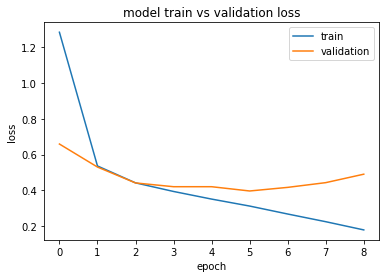

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

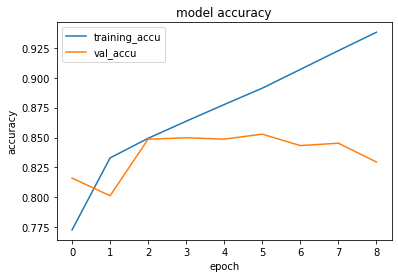

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accu', 'val_accu'], loc='upper left')
plt.show()